In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set()
sns.set_style("white", rc={
    'axes.grid': False,
    'axes.labelcolor': '0.4',
    'axes.edgecolor': '0.8',
    'axes.facecolor': '1.0',
    'text.color': '0.4',
    'xtick.color': '0.4',
    'ytick.color': '0.4',
    'axes.linewidth': 2,
})
palette = sns.color_palette("Spectral_r", 350)
sns.set_palette(palette)
sns.set_context("notebook", font_scale=1.2)

In [111]:
data = pd.read_csv("Assets/.logs/elite_fitness.csv", header=None, names=["generation", "fitness", "duration"])
df = pd.DataFrame(data[["fitness", "duration"]], index=data["generation"])

In [ ]:
# df.plot(subplots=True)

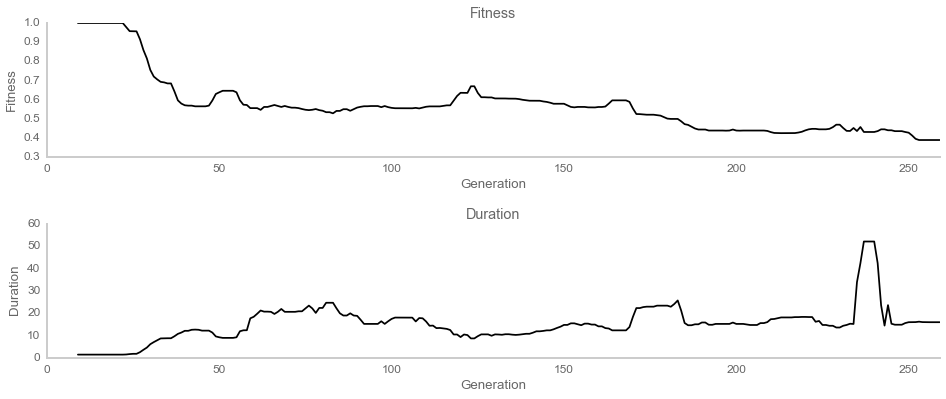

In [182]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 6))
fig.subplots_adjust(hspace=.5)

pd.rolling_median(df, 10).plot(subplots=True, ax=axes, grid=False, legend=False)

axes[0].set_title("Fitness")
axes[0].set_xlabel("Generation")
axes[0].set_ylabel("Fitness")

axes[1].set_title("Duration")
axes[1].set_xlabel("Generation")
axes[1].set_ylabel("Duration")

sns.despine()

In [221]:
data = pd.read_csv("Assets/.logs/species.csv", header=None, names=["generation", "species", "size", "fitness"])
data = data[data["generation"] > 200]
df = data.groupby(["generation", "species"])["size"].mean().unstack("species").fillna(0)
df

species,185,187,189,190,193,194,196,197,198,199,...,260,261,262,263,264,265,266,267,268,269
generation,,,,,,,,,,,,,,,,,,,,,
201,19,16,1,14,18,19,29,49,35,0,...,0,0,0,0,0,0,0,0,0,0
202,24,23,44,14,23,23,24,25,0,0,...,0,0,0,0,0,0,0,0,0,0
203,27,16,26,27,26,25,26,25,0,1,...,0,0,0,0,0,0,0,0,0,0
204,22,16,8,21,20,21,3,20,0,38,...,0,0,0,0,0,0,0,0,0,0
205,22,9,29,28,21,21,32,20,0,4,...,0,0,0,0,0,0,0,0,0,0
206,22,20,10,13,21,21,10,20,0,27,...,0,0,0,0,0,0,0,0,0,0
207,20,0,34,31,20,20,32,18,0,6,...,0,0,0,0,0,0,0,0,0,0
208,24,0,20,0,24,24,1,22,0,47,...,0,0,0,0,0,0,0,0,0,0
209,26,0,26,0,26,26,42,25,0,8,...,0,0,0,0,0,0,0,0,0,0


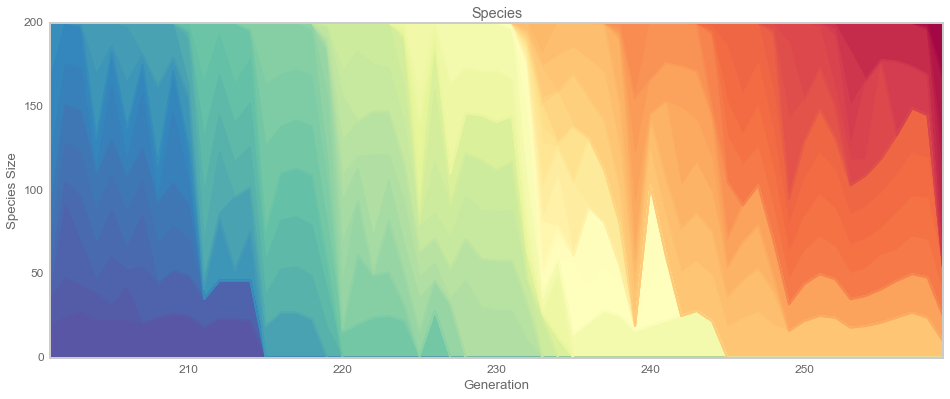

In [224]:
palette = sns.color_palette("Spectral_r", len(df.columns.values))

ax = df.plot(kind="area", stacked=True, legend=False, title="Species", figsize=(16, 6), color=palette)
ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")

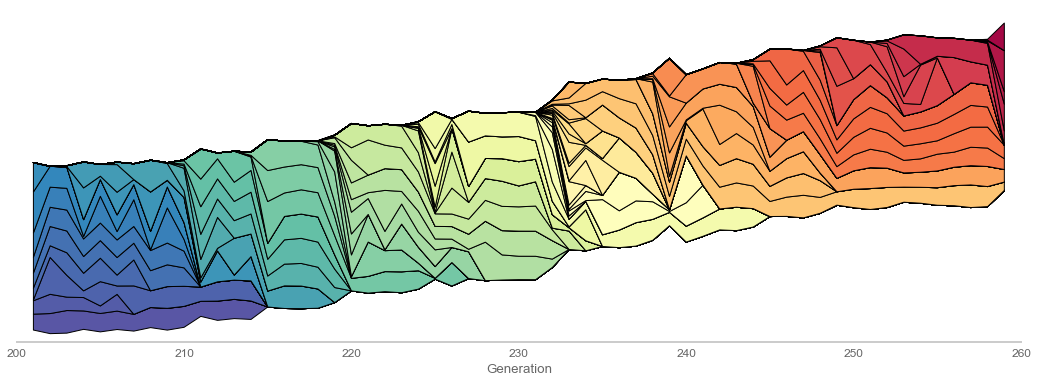

In [225]:
from matplotlib import transforms

X = df.index.values
Y = [df[c] for c in df.columns.values]

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)

palette = sns.color_palette("Spectral_r", len(df.columns.values))
plt.stackplot(X, *Y, colors=palette, baseline="wiggle", linewidths=1)

ax.set_xlabel("Generation")
ax.set_ylabel("Species Size")
ax.get_yaxis().set_visible(False)

sns.despine(left=True, trim=True)